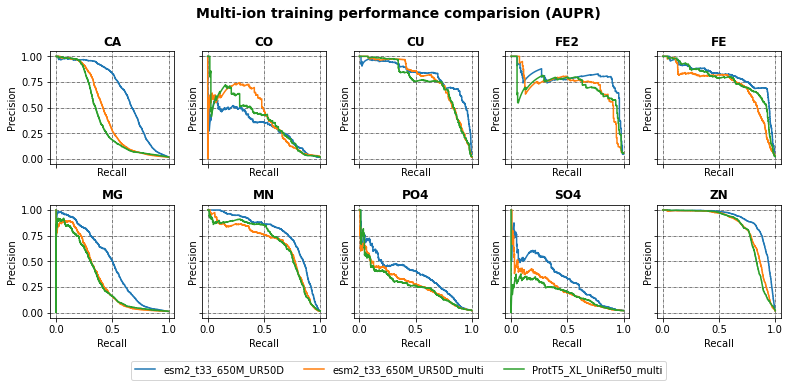

In [5]:
# Load pickle
import pickle5 as pickle
import matplotlib.pyplot as plt

model_list = ['esm2_t33_650M_UR50D','esm2_t33_650M_UR50D_multi','ProtT5_XL_UniRef50_multi']

# using the style for the plot
#plt.style.use('seaborn')

figure, axes = plt.subplots(2,5, figsize=(11,5), sharey=True, sharex=True)
axes_ = axes.flatten()

fields = ['CA','CO','CU','FE2','FE','MG','MN','PO4','SO4','ZN', 'null']
for model_name in model_list:
    with open('results/%s_perf_foldwise.pickle'%(model_name), 'rb') as handle:
        perf_dict = pickle.load(handle)

    for ion in fields:
        ion_index = fields.index(ion)
        if ion=='null':
            continue
        axes_[ion_index].plot(perf_dict[1][ion]['recall'], perf_dict[1][ion]['precision'], label=model_name)
        #axes_[ion_index].plot(perf_dict[ion]['fpr'], perf_dict[ion]['tpr'], color='black', label='aupr:%s'%(round(perf_dict[ion]['aupr'],2)))
        axes_[ion_index].set_xlabel('Recall')
        axes_[ion_index].set_ylabel('Precision')
        #axes_[ion_index].legend()
        axes_[ion_index].set_title(ion, fontweight='bold')

for ax in axes_:
    ax.grid(color='black', linestyle='-.', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
figure.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.07))
figure.suptitle('Multi-ion training performance comparision (AUPR)', fontweight='bold', fontsize=14)
plt.tight_layout()

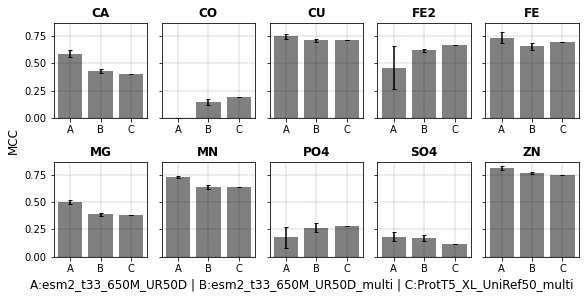

In [26]:
import numpy as np
figure, axes = plt.subplots(2,5, figsize=(8,4), sharey=True)
axes_ = axes.flatten()

model_list = ['esm2_t33_650M_UR50D','esm2_t33_650M_UR50D_multi','ProtT5_XL_UniRef50_multi']
for ion in fields:
    if ion=='null':
        continue
    ion_index = fields.index(ion)
    mcc_values_means, errors = [], []
    for model_name in model_list:
        with open('results/%s_perf_foldwise.pickle'%(model_name), 'rb') as handle:
            perf_dict_foldwise = pickle.load(handle)
        mcc_values, error_values = [], []
        for key in perf_dict_foldwise.keys():
            mcc_values.append(perf_dict_foldwise[key][ion]['mcc'])
        mcc_values_means.append(np.mean(mcc_values))
        errors.append(np.std(mcc_values))

    axes_[ion_index].bar(["A", "B", "C"], mcc_values_means, yerr=errors, color='gray', ecolor='black', capsize=2)
    axes_[ion_index].set_title(ion, fontweight='bold')
    #axes_[ion_index].set_xlabel('Model')
    #axes_[ion_index].set_ylabel('MCC', fontsize=12)
for ax in axes_:
    ax.grid(color='black', linestyle='-.', linewidth=0.2)
figure.text(0.5, -0, 'A:esm2_t33_650M_UR50D | B:esm2_t33_650M_UR50D_multi | C:ProtT5_XL_UniRef50_multi', ha='center', va='center', fontsize=12)
figure.text(0, 0.5, 'MCC', ha='center', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()

In [9]:
np.mean(mcc_values)


0.4033482527758919

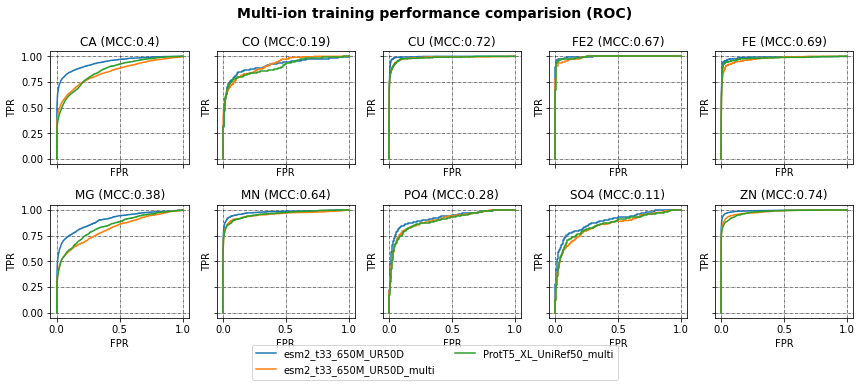

In [9]:
# Load pickle
import pickle5 as pickle
import matplotlib.pyplot as plt

model_list = ['esm2_t33_650M_UR50D','esm2_t33_650M_UR50D_multi','ProtT5_XL_UniRef50_multi']

# using the style for the plot
#plt.style.use('seaborn')

figure, axes = plt.subplots(2,5, figsize=(12,5), sharey=True, sharex=True)
axes_ = axes.flatten()

fields = ['CA','CO','CU','FE2','FE','MG','MN','PO4','SO4','ZN', 'null']
for model_name in model_list:
    with open('results/%s_perf.pickle'%(model_name), 'rb') as handle:
        perf_dict = pickle.load(handle)

    for ion in fields:
        ion_index = fields.index(ion)
        if ion=='null':
            continue
        axes_[ion_index].plot(perf_dict[ion]['fpr'], perf_dict[ion]['tpr'], label=model_name)
        axes_[ion_index].set_xlabel('FPR')
        axes_[ion_index].set_ylabel('TPR')
        #axes_[ion_index].legend()
        axes_[ion_index].set_title(ion+' (MCC:%s)'%(round(perf_dict[ion]['mcc'], 2)))

for ax in axes_:
    ax.grid(color='black', linestyle='-.', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
figure.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.07))
figure.suptitle('Multi-ion training performance comparision (ROC)', fontweight='bold', fontsize=14)
plt.tight_layout()